# Анализ и классификация датасета Fashion MNIST

В этой работе мы проведем анализ данных Fashion MNIST, визуализируем примеры и обучим три модели для сравнения:
1. **Logistic Regression** (Классическая линейная модель)
2. **Random Forest** (Ансамблевая классическая модель)
3. **CNN** (Модель нейронной сети)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

## 1. Загрузка и первичный осмотр данных

In [7]:
train_df = pd.read_csv('data/fashion-mnist_train.csv')
test_df = pd.read_csv('data/fashion-mnist_test.csv')

Fashion-MNIST — это набор данных из 70 000 изображений одежды и аксессуаров размером 28×28 пикселей в оттенках серого.

| Класс | Название         |
|-------|------------------|
| 0     | Футболка/топ     |
| 1     | Брюки            |
| 2     | Пуловер          |
| 3     | Платье           |
| 4     | Пальто           |
| 5     | Сандалии         |
| 6     | Рубашка          |
| 7     | Кроссовки        |
| 8     | Сумка            |
| 9     | Ботинки          |


In [8]:
print("Размер обучающей выборки:", train_df.shape)
print("Размер тестовой выборки:", test_df.shape)

Размер обучающей выборки: (60000, 785)
Размер тестовой выборки: (10000, 785)


## 2. Визуальный анализ данных (EDA)

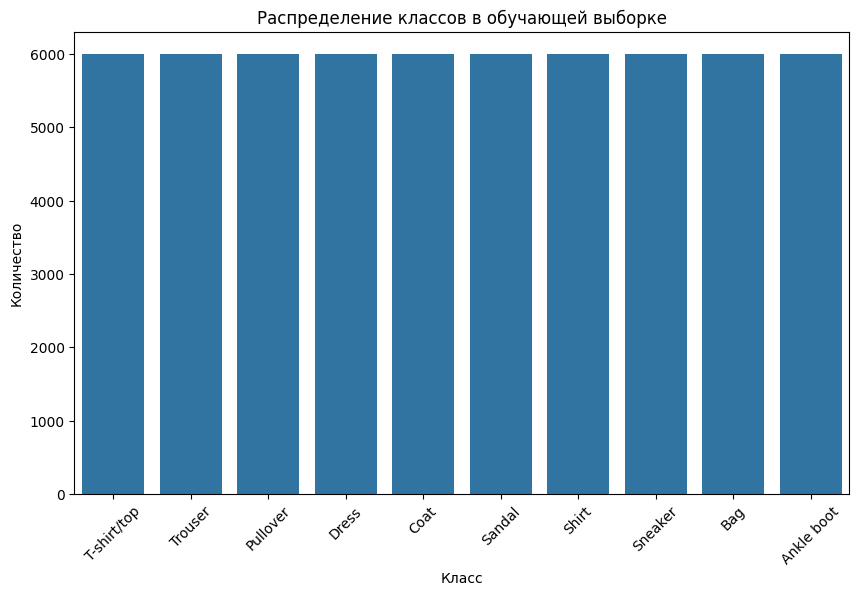

In [9]:
labels_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_df)
plt.title('Распределение классов в обучающей выборке')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(ticks=range(10), labels=[labels_map[i] for i in range(10)], rotation=45)
plt.show()

По графику видно, что все 10 классов распределены равномерно: по 6000 изображений в каждом.

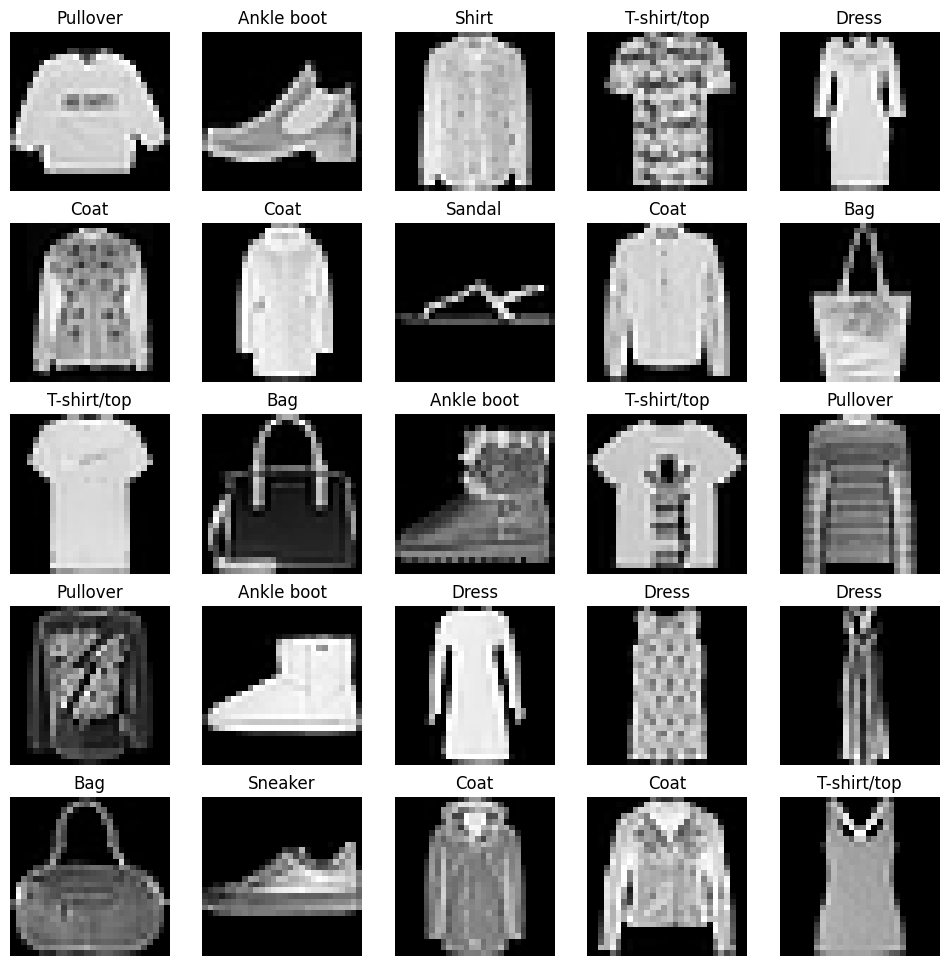

In [10]:
def plot_sample_images(data, labels, map_labels):
    plt.figure(figsize=(12, 12))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        img = data[i].reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(map_labels[labels[i]])
        plt.axis('off')
    plt.show()

X_train_vis = train_df.drop('label', axis=1).values
y_train_vis = train_df['label'].values

plot_sample_images(X_train_vis, y_train_vis, labels_map)

## 3. Подготовка данных

In [11]:
# Данные для классических моделей (вектор 784 признаков)
X_train = train_df.drop('label', axis=1).values.astype('float32') / 255.0
y_train = train_df['label'].values

X_test = test_df.drop('label', axis=1).values.astype('float32') / 255.0
y_test = test_df['label'].values

# Данные для CNN (изображение 28x28x1)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

## 4. Классические модели

### 4.1 Logistic Regression
Базовая линейная модель.

In [12]:
log_reg = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [13]:
y_pred_lr = log_reg.predict(X_test)
print("Точность (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nОтчет о классификации (LogReg):\n", classification_report(y_test, y_pred_lr, target_names=[labels_map[i] for i in range(10)]))

Точность (Logistic Regression): 0.8525

Отчет о классификации (LogReg):
               precision    recall  f1-score   support

 T-shirt/top       0.79      0.82      0.80      1000
     Trouser       0.95      0.97      0.96      1000
    Pullover       0.77      0.76      0.76      1000
       Dress       0.86      0.86      0.86      1000
        Coat       0.78      0.80      0.79      1000
      Sandal       0.93      0.91      0.92      1000
       Shirt       0.65      0.60      0.62      1000
     Sneaker       0.90      0.92      0.91      1000
         Bag       0.94      0.94      0.94      1000
  Ankle boot       0.93      0.95      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### 4.2 Random Forest
Ансамблевая модель на основе дерева решений.

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
y_pred_rf = rf_model.predict(X_test)
print("Точность (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nОтчет о классификации (Random Forest):\n", classification_report(y_test, y_pred_rf, target_names=[labels_map[i] for i in range(10)]))

Точность (Random Forest): 0.8858

Отчет о классификации (Random Forest):
               precision    recall  f1-score   support

 T-shirt/top       0.81      0.87      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.81      0.80      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.80      0.86      0.83      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.76      0.62      0.68      1000
     Sneaker       0.92      0.93      0.93      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.94      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.88      0.89      0.88     10000
weighted avg       0.88      0.89      0.88     10000



## 5. Нейронная сеть (CNN)
Для достижения высокой точности мы будем использовать CNN, поскольку эта модель эффективно справляется с задачами обработки изображений.

In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/opt/anaconda3/envs/ml_projects/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-28 13:22:48.561198: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2026-01-28 13:22:48.561266: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2026-01-28 13:22:48.561269: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.66 GB
2026-01-28 13:22:48.561429: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-01-28 13:22:48.561439: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_

In [17]:
# Обучение CNN
history = model.fit(X_train_cnn, y_train, 
                    epochs=30, 
                    batch_size=64, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/30


2026-01-28 13:22:49.525222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.7933 - loss: 0.6098 - val_accuracy: 0.8547 - val_loss: 0.4059
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8716 - loss: 0.3577 - val_accuracy: 0.8876 - val_loss: 0.3100
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8910 - loss: 0.3033 - val_accuracy: 0.9062 - val_loss: 0.2673
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8987 - loss: 0.2777 - val_accuracy: 0.9102 - val_loss: 0.2519
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.9059 - loss: 0.2617 - val_accuracy: 0.9165 - val_loss: 0.2298
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9094 - loss: 0.2475 - val_accuracy: 0.9193 - val_loss: 0.2291
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9166 - loss: 0.2306 - val_accuracy: 0.9222 - val_loss: 0.2138
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9201 - loss: 0.2211 - val_accurac

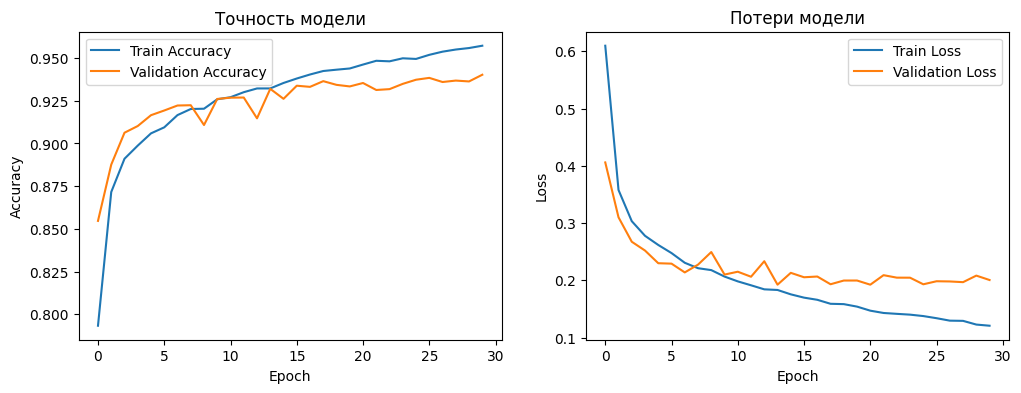

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Точность модели')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Потери модели')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

На графике видно что модель обучилась достаточно хорошо и рост точности был на протяжении каждой эпохи.

In [19]:

test_loss, test_acc = model.evaluate(X_test_cnn, y_test, verbose=0) 
print(f"Точность нейронной сети (CNN) на тестовых данных: {test_acc:.4f}")
y_pred_prob = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_prob, axis=1)

y_true = y_test 

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    digits=2
))


Точность нейронной сети (CNN) на тестовых данных: 0.9419
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.91      0.89      0.90      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.93      0.90      0.91      1000
       Dress       0.93      0.95      0.94      1000
        Coat       0.90      0.92      0.91      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.82      0.83      0.83      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       1.00      0.99      0.99      1000
  Ankle boot       0.97      0.98      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



## 6. Сравнение и выводы

| Модель | Тип | Точность | 
|--------|-----|----------|
| **Logistic Regression** | Линейная | ≈ 85 % |
| **Random Forest** | Ансамбль | ≈ 89 % |
| **CNN** | Нейронная сеть | ≈ 94 % |

**Вывод:**  
CNN существенно превосходит остальные методы (94 %), подтверждая преимущество глубокого обучения при наличии данных и ресурсов. Random Forest уступает CNN, но превосходит логистическую регрессию.
